In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6])
print(x)
print(x.shape)
print(y)
print(y.shape)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
(12,)
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]
(12,)


In [5]:
def linregress(x,w,b):
    y = np.dot(w,x)+b
    return y

In [16]:
def plot(x,y,w,b):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    #plt.xlim([0,2.0])
    #plt.ylim([0,0.2])
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')

    x_line = x
    y_line = linregress(x,w,b)
    plt.plot(x_line, y_line, 'b-', lw = 2)

    plt.show()

In [17]:
x.shape

(12,)

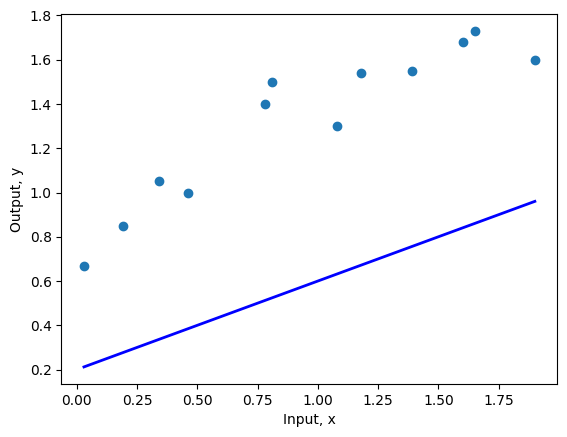

In [18]:
w = 0.4; b = 0.2
plot(x,y,w,b)

In [25]:
def compute_loss(x,y,w,b):
    yhat = linregress(x,w,b)
    m = x.shape[0]
    loss = np.sum(((yhat - y)**2))/(2*m)
    return loss

In [26]:
loss = compute_loss(x,y,w,b)
loss

np.float64(0.2863248333333333)

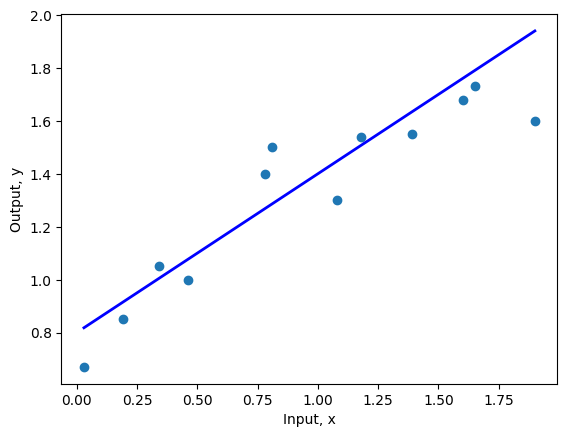

In [35]:
w = 0.6; b = 0.8
plot(x,y,w,b)

In [36]:
loss = compute_loss(x,y,w,b)
loss

np.float64(0.010528999999999995)

In [37]:
w_mesh, b_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))
all_losses = np.zeros_like(b_mesh)
for indices, temp in np.ndenumerate(b_mesh):
    all_losses[indices] = compute_loss(x,y,w_mesh[indices],b_mesh[indices])

/tmp/ipykernel_1687/1488324800.py:5: UserWarning: The following kwargs were not used by contour: 'colours'
  ax.contourf(w_mesh, b_mesh, all_losses, colours=['#80808080'])


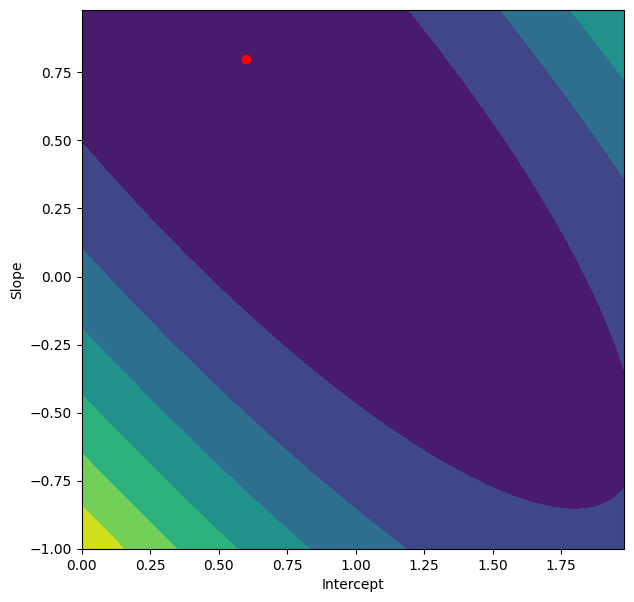

In [38]:
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(w_mesh, b_mesh, all_losses, colours=['#80808080'])
ax.set_xlabel(r'Intercept')
ax.set_ylabel(r'Slope')

ax.plot(w,b,'ro')
plt.show()